In [3]:
import pygmt
import pandas as pd
import numpy as np

In [5]:
# Load the catalogs 
matched_events_mycatalog= pd.read_csv('../data/matched_events_mycatalog.csv')
unmatched_events_mycatalog= pd.read_csv('../data/unmatched_events_mycatalog.csv')
unmatched_events_morton= pd.read_csv('../data/unmatched_events_morton.csv')

In [6]:
# Print matched_events_mycatalog
matched_events_mycatalog

,Unnamed: 0.1,Unnamed: 0,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick,datetime
0,0,0,0,2012-10-01 04:32:57.526930+00:00,-95.153374,-109.358894,38.671875,9,40.759805,-125.876866,38.671875,0,191641,0.691466,FS20B,S,1.349066e+09,2012-10-01 04:32:57.526930+00:00
1,93,93,9,2012-10-01 23:30:57.302812+00:00,-4.086341,-124.602166,36.328125,16,40.628030,-124.798298,36.328125,9,437,0.041724,FS09B,P,1.349134e+09,2012-10-01 23:30:57.302812+00:00
2,185,185,15,2012-10-02 04:25:44.969762+00:00,-35.609545,-123.077839,43.359375,23,40.640999,-125.170966,43.359375,15,458,0.335479,FS09B,P,1.349152e+09,2012-10-02 04:25:44.969762+00:00
3,222,222,17,2012-10-02 05:16:27.234296+00:00,16.929128,-128.412984,48.828125,23,40.593549,-124.550010,48.828125,17,460,0.059530,FS09B,P,1.349155e+09,2012-10-02 05:16:27.234296+00:00
4,245,245,18,2012-10-02 06:17:20.349050+00:00,-44.949753,-120.029185,30.078125,12,40.667997,-125.281597,30.078125,18,472,-0.919597,FS09B,P,1.349159e+09,2012-10-02 06:17:20.349050+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,4527,4527,365,2012-10-28 01:12:44.067026+00:00,-46.117279,-116.218367,37.109375,33,40.702248,-125.295684,37.109375,365,4101,0.295670,FS09B,P,1.351387e+09,2012-10-28 01:12:44.067026+00:00
74,4751,4751,384,2012-10-30 01:39:09.926640+00:00,56.625014,-95.639950,25.390625,15,40.886888,-124.078125,25.390625,384,18752,0.065035,FS13B,P,1.351561e+09,2012-10-30 01:39:09.926640+00:00
75,4948,4948,401,2012-10-31 04:38:06.622325+00:00,-42.614701,-160.423855,28.515625,8,40.304363,-125.251269,28.515625,401,4563,0.183278,FS09B,P,1.351658e+09,2012-10-31 04:38:06.622325+00:00
76,4980,4980,405,2012-10-31 15:29:51.521419+00:00,93.985848,-87.256150,49.609375,25,40.958934,-123.633621,49.609375,405,4611,-0.315045,FS09B,P,1.351697e+09,2012-10-31 15:29:51.521419+00:00


In [7]:
# Print unmatched_events_mycatalog
unmatched_events_mycatalog

,Unnamed: 0.1,Unnamed: 0,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick,datetime
0,9,9,1,2012-10-01 06:49:31.081854+00:00,-0.583763,-136.034620,37.890625,7,40.525087,-124.756889,37.890625,1,47726,-0.892706,FS20B,P,1.349074e+09,2012-10-01 06:49:31.081854+00:00
1,16,16,2,2012-10-01 07:27:43.749368+00:00,12.259024,-142.894092,40.234375,11,40.463224,-124.605460,40.234375,2,4867,1.310642,FS13B,P,1.349076e+09,2012-10-01 07:27:43.749368+00:00
2,27,27,3,2012-10-01 11:20:41.930037+00:00,-25.101810,-148.229238,33.984375,9,40.414891,-125.045751,33.984375,3,380,0.857025,FS09B,P,1.349090e+09,2012-10-01 11:20:41.930037+00:00
3,36,36,4,2012-10-01 12:32:08.467516+00:00,29.771915,-134.510293,46.484375,19,40.538280,-124.398583,46.484375,4,383,0.782125,FS09B,P,1.349095e+09,2012-10-01 12:32:08.467516+00:00
4,55,55,5,2012-10-01 16:03:31.622286+00:00,29.771915,-176.429291,37.109375,11,40.160779,-124.400537,37.109375,5,394,1.350703,FS09B,P,1.349107e+09,2012-10-01 16:03:31.622286+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,5048,5048,410,2012-10-31 19:37:37.707399+00:00,97.488426,-99.450768,25.390625,6,40.848736,-123.593939,25.390625,410,157692,0.324574,JCC,P,1.351712e+09,2012-10-31 19:37:37.707399+00:00
410,5054,5054,411,2012-10-31 22:15:10.233710+00:00,-27.436862,-94.877786,24.609375,10,40.895249,-125.075589,24.609375,411,4639,1.085043,FS09B,P,1.351722e+09,2012-10-31 22:15:10.233710+00:00
411,5064,5064,412,2012-10-31 23:36:25.199650+00:00,-107.996161,-132.985966,37.890625,14,40.545507,-126.024869,37.890625,412,4649,-0.316720,FS09B,P,1.351727e+09,2012-10-31 23:36:25.199650+00:00
412,5078,5078,413,2012-10-31 23:52:18.863116+00:00,-30.939441,-123.840003,25.390625,6,40.634324,-125.115721,25.390625,413,4651,0.338372,FS09B,P,1.351728e+09,2012-10-31 23:52:18.863116+00:00


In [15]:
# Print unmatched_events_morton
unmatched_events_morton.keys()

Index(['Unnamed: 0', 'CI YEAR', 'TSTRING', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'SECOND', 'LAT', 'LON', 'DEPTH', 'Md',
       'Num P&S with weights > 0.1', 'max az gap', 'dist to nearest stn',
       'tt RMS', 'ERH', 'ERZ', 'STRIKE', 'DIP', 'RAKE', 'PLATE DESIGNATION',
       'TEMPLATE EVENT?', 'datetime'],
      dtype='object')

/tmp/ipykernel_1583270/2564521525.py:5: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x = unmatched_events_mycatalog['longitude'], y = unmatched_events_mycatalog['latitude'],
/tmp/ipykernel_1583270/2564521525.py:7: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x = matched_events_mycatalog['longitude'], y = matched_events_mycatalog['latitude'],
/tmp/ipykernel_1583270/2564521525.py:9: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x = unmatched_events_morton['LON'], y = unmatched_events_morton["LAT"],
text [WARNING]: Skipped 1 records as blank - please check input data.


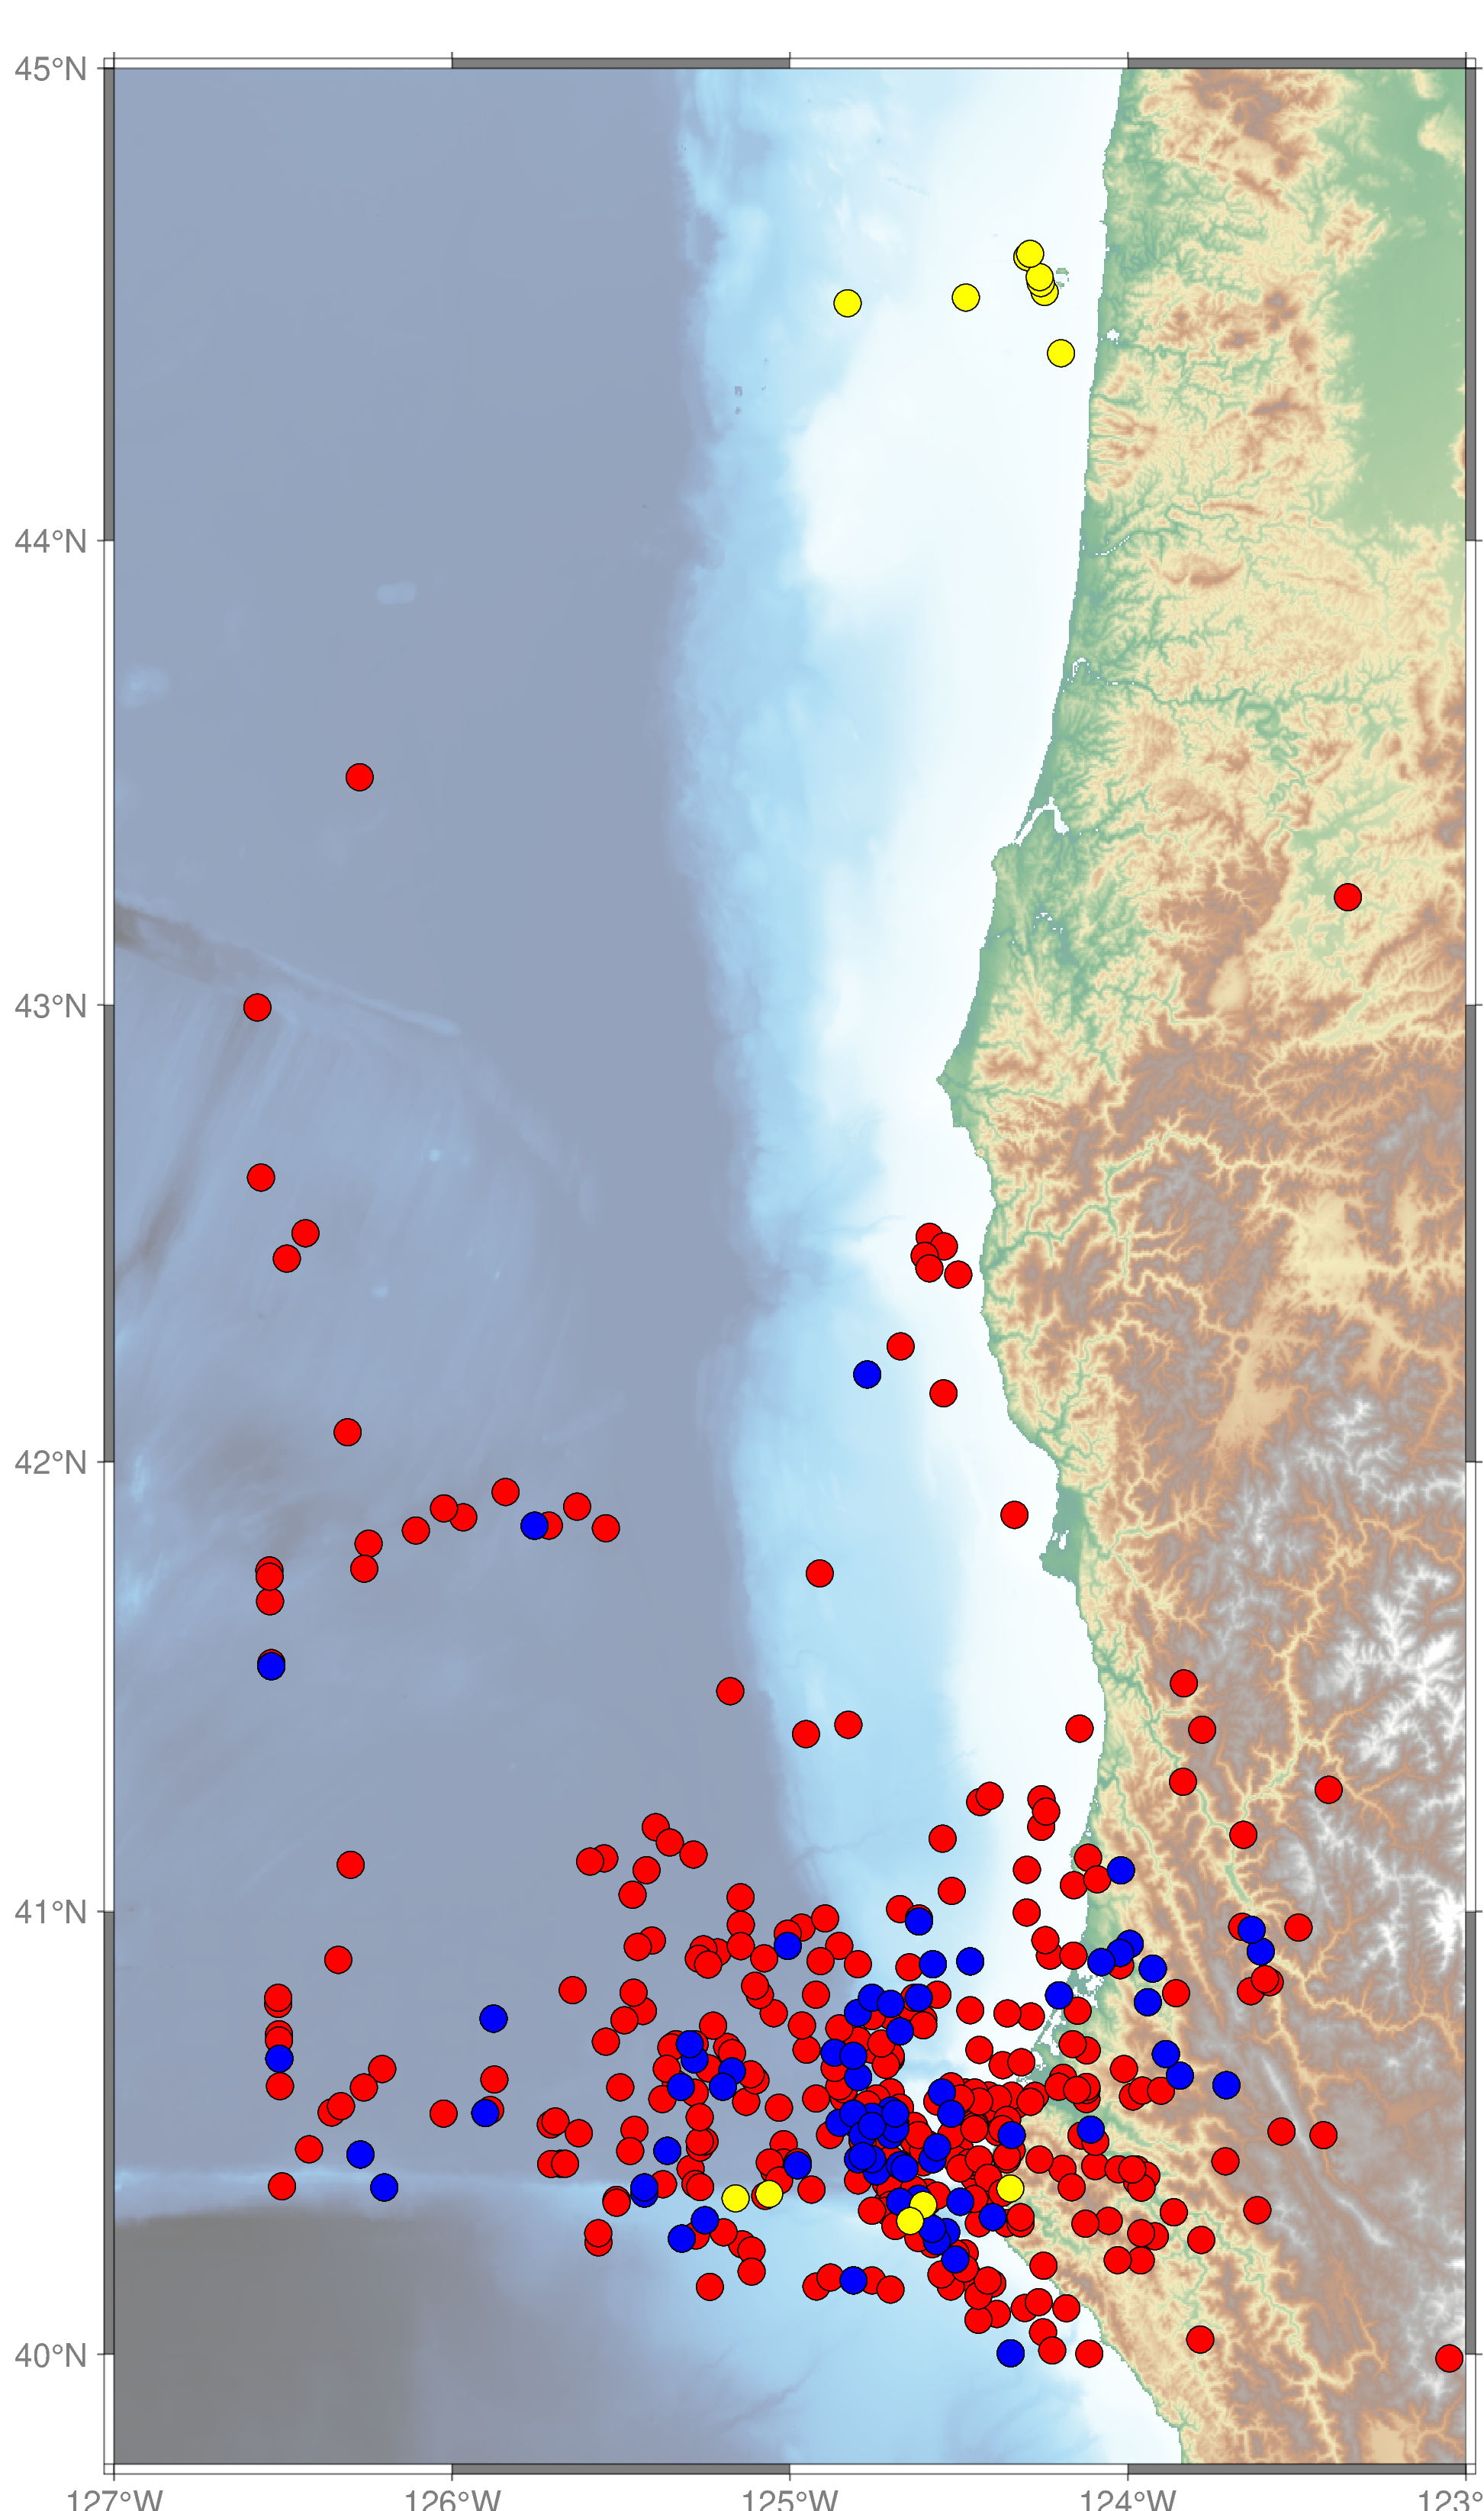

In [9]:
# Plot the matched events between our catalog and Morton's catalog, unmatched events in our catalogs and unmatched events in Morton's catalog
fig = pygmt.Figure()
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=[-127, -123, 39.75, 45])
fig.grdimage(grid=grid, projection="M15c", frame=['a',"+tMatched and Unmatched Events"], cmap="geo", transparency = 50)
fig.plot(x = unmatched_events_mycatalog['longitude'], y = unmatched_events_mycatalog['latitude'],  
         color = 'red', size = np.ones(len(unmatched_events_mycatalog)) * 0.3, style = "c", pen = "black")
fig.plot(x = matched_events_mycatalog['longitude'], y = matched_events_mycatalog['latitude'],  
         color = 'blue', size = np.ones(len(matched_events_mycatalog)) * 0.3, style = "c", pen = "black")
fig.plot(x = unmatched_events_morton['LON'], y = unmatched_events_morton["LAT"],  
         color = 'yellow', size = np.ones(len(unmatched_events_morton)) * 0.3, style = "c", pen = "black")
# Add title using GMT text command
fig.text(text="", x=-127, y=46, font="15p,Helvetica-Bold,black", justify="LM")
fig.show()

